# 2.3章 Iris_data_setを使用したパセープトロンモデルのトレーニング


https://github.com/rasbt/python-machine-learning-book-2nd-edition

## 必要なpython packageをインストールするには ! をつけてpip installしてください。

## Irisデータセットの読み込み

以下のサイトからトレーニングデータを読み込みます。

#### https://archive.ics.uci.edu/ml/datasets/iris


In [ ]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## matplotlibを使用してデータをプロットする

matplotlibを使用することでデータをプロットすることができます。
ここではIris-setosaとIris-versicolorの花びらの長さと萼の長さをプロットしています。

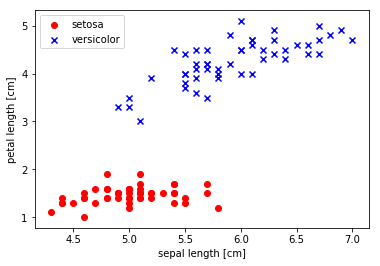

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# 1-100行目の目的変数の抽出
y = df.iloc[0:100, 4].values
# Iris-sentosaを-1, Iris-virginicaを1に変換
y = np.where(y == 'Iris-setosa', -1, 1)
# 1-100行目の1, 3列目の抽出
X = df.iloc[0:100, [0, 2]].values
# 品種setosaのプロット（red o）
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
# 品種versicolorのプロット（blue x）
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
# 軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
# 凡例の設定（左上）
plt.legend(loc='upper left')
# 図の表示
plt.show()

## パーセプトロンの分類機クラス

In [3]:
import numpy as np
class Perceptron(object):
    """ パーセプトロンの分類機
    パラメータ
    -----------
    eta: float
      学習率（0.0より大きく1.0以下の値）
    n_iter: int
      重みを初期化するための乱数シード
    属性
    -----------
    w_ : １次元配列
      適用後の重み
    errors: リスト
      各エポックでの誤分類（更新）の数
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ トレーニングデータに適合させる
        パラメータ
        -----------
        X: { 配列のようなデータ構造 }, shape = [n_samples, n_features]
           トレーニングデータ
           n_samplesはサンプルの個数, n_featuresは特徴量の個数
        y: 配列のようなデータ構造, shape = [n_samples]
           目的変数
        戻り値
        -----------
        self: object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter): # トレーニング回数分トレーニングデータを反復
            errors = 0
            for xi, target in zip(X, y): # 各サンプルで重みを更新
                # 重みw1,...wmの更新
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                # 重みw0の更新
                self.w_[0] += update
                # 重みの更新が 0 でない場合は誤分類としてカウント
                errors += int(update != 0.0)
            # 反復回数ごとの誤差を格納
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """ 総入力を計算 """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """ 1ステップ後のクラスラベルを返す """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

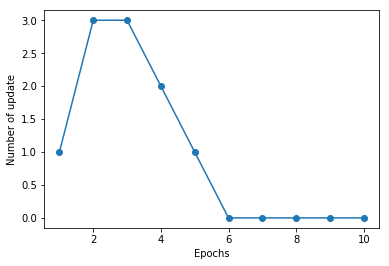

In [4]:
# パーセプトロンのオブジェクトの作成（インスタンス化）
ppn = Perceptron(eta=0.1, n_iter=10)
# トレーニングデータへのモデルの適合
ppn.fit(X, y)
# エポックと誤分類誤差の関係の折れ線グラフをプロット
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Number of update')

plt.show()

要素
[[ 3.3   3.32  3.34 ...,  7.94  7.96  7.98]
 [ 3.3   3.32  3.34 ...,  7.94  7.96  7.98]
 [ 3.3   3.32  3.34 ...,  7.94  7.96  7.98]
 ..., 
 [ 3.3   3.32  3.34 ...,  7.94  7.96  7.98]
 [ 3.3   3.32  3.34 ...,  7.94  7.96  7.98]
 [ 3.3   3.32  3.34 ...,  7.94  7.96  7.98]]
[[ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.02  0.02  0.02 ...,  0.02  0.02  0.02]
 [ 0.04  0.04  0.04 ...,  0.04  0.04  0.04]
 ..., 
 [ 6.04  6.04  6.04 ...,  6.04  6.04  6.04]
 [ 6.06  6.06  6.06 ...,  6.06  6.06  6.06]
 [ 6.08  6.08  6.08 ...,  6.08  6.08  6.08]]
np.array([xx1.ravel(), xx2.ravel()]).T
[[ 3.3   0.  ]
 [ 3.32  0.  ]
 [ 3.34  0.  ]
 ..., 
 [ 7.94  6.08]
 [ 7.96  6.08]
 [ 7.98  6.08]]
Z
[-1 -1 -1 ...,  1  1  1]
xx1
[[ 3.3   3.32  3.34 ...,  7.94  7.96  7.98]
 [ 3.3   3.32  3.34 ...,  7.94  7.96  7.98]
 [ 3.3   3.32  3.34 ...,  7.94  7.96  7.98]
 ..., 
 [ 3.3   3.32  3.34 ...,  7.94  7.96  7.98]
 [ 3.3   3.32  3.34 ...,  7.94  7.96  7.98]
 [ 3.3   3.32  3.34 ...,  7.94  7.96  7.98]]
xx2
[[ 0.    

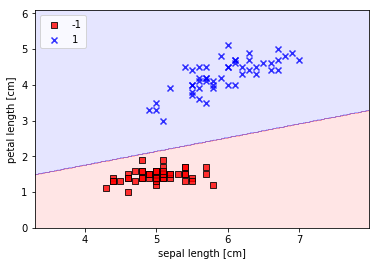

In [5]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface 
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1        
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    print("要素")
    print(xx1)
    print(xx2)
    
    # predict ()
    # 転置している.T
    # numpy.ndarray.T
    print("np.array([xx1.ravel(), xx2.ravel()]).T")
    print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    print("Z")
    print(Z)
    
    print("xx1")
    print(xx1)
    print("xx2")
    print(xx2)

    
    Z = Z.reshape(xx1.shape)
    print("Z")    
    print(Z)
    
    # contourfは等高線を引く関数　alphaは色合い
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples（クラスのサンプルをプロット）
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')




plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()


## 2次元データセットの決定境界を可視化するための便利な関数

# 2.4 ADALINEと学習の収束

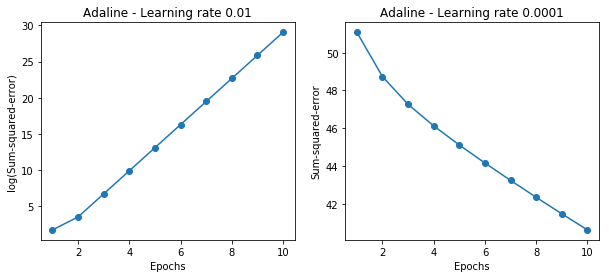

In [6]:
# ## Implementing an adaptive linear neuron in Python


class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)




fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()


In [1]:
# 2.5.2 特徴量のスケーリングを通じて勾配降下法を改善する